In [1]:
def load_namespace():
    import sys
    sys.path.insert(1,f'/wsu/home/gy/gy40/gy4065/hm_jetscapeml_source')#WSU Grid
    sys.path.insert(1,f'/content/drive/My Drive/Projects/110_JetscapeMl/hm_jetscapeml_source')#Colab GDrive v1
    sys.path.insert(1,f'/content/drive/MyDrive/Projects/110_JetscapeMl/hm_jetscapeml_source')#Colab GDrive v2
    sys.path.insert(1,f'/mnt/g/My Drive/Projects/110_JetscapeMl/hm_jetscapeml_source')#wsl gdrive
    sys.path.insert(1,f'G:\\My Drive\\Projects\\110_JetscapeMl\\hm_jetscapeml_source') #Windows GDrive
    sys.path.insert(1,f'/home/arsalan/Projects/110_JetscapeML/hm_jetscapeml_source/') #office tower
    
load_namespace()

In [ ]:
# Loading/Preparing Environment for simulation
from jet_ml.config import Config
folds=2
epochs=2
dataset_size=1000 #10800000 #1000000
model_name="point_net"
simulation_name=f"alpha_s_{model_name}_{folds}_fold_{epochs}_epoch_{int(dataset_size/1000)}k_dataset_size_gridexpress_balanced_datatset_test"

config=Config(simulation_name=simulation_name)
config.__str__()

2024-10-18 14:59:19.950020: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-18 14:59:19.957531: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-18 14:59:19.966577: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-18 14:59:19.969393: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-18 14:59:19.976135: I tensorflow/core/platform/cpu_feature_guar

Directory /home/arsalan/Projects/110_JetscapeML/hm_jetscapeml_source/models/alpha_s_point_net_2_fold_2_epoch_1k_dataset_size_gridexpress_balanced_datatset_test already exists.
Directory /home/arsalan/Projects/110_JetscapeML/hm_jetscapeml_source/reports/alpha_s_point_net_2_fold_2_epoch_1k_dataset_size_gridexpress_balanced_datatset_test already exists.
Directory /home/arsalan/Projects/110_JetscapeML/hm_jetscapeml_source/reports/figures/alpha_s_point_net_2_fold_2_epoch_1k_dataset_size_gridexpress_balanced_datatset_test already exists.


2024-10-18 14:59:21.002619: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


'Project Root: /home/arsalan/Projects/110_JetscapeML/hm_jetscapeml_source\nData Directory: /home/arsalan/Projects/110_JetscapeML/hm_jetscapeml_source/data\nModels Directory: /home/arsalan/Projects/110_JetscapeML/hm_jetscapeml_source/models\nReports Directory: /home/arsalan/Projects/110_JetscapeML/hm_jetscapeml_source/reports\nFigures Directory: /home/arsalan/Projects/110_JetscapeML/hm_jetscapeml_source/reports/figures\nSimulation Models Directory: /home/arsalan/Projects/110_JetscapeML/hm_jetscapeml_source/models/alpha_s_point_net_2_fold_2_epoch_1k_dataset_size_gridexpress_balanced_datatset_test\nSimulation Reports Directory: /home/arsalan/Projects/110_JetscapeML/hm_jetscapeml_source/reports/alpha_s_point_net_2_fold_2_epoch_1k_dataset_size_gridexpress_balanced_datatset_test\nSimulation Figures Directory: /home/arsalan/Projects/110_JetscapeML/hm_jetscapeml_source/reports/figures/alpha_s_point_net_2_fold_2_epoch_1k_dataset_size_gridexpress_balanced_datatset_test\nEnvironment Details:\n  T

In [3]:
from IPython.display import display
# with tf.device("CPU"):
import jet_ml.classifiers.alpha_s.preprocess_dataset as pred
(x,y_raw,y_df)=pred.preprocess_dataset_for_alpha_s(dataset_size)
y_classes=y_df.columns
y=y_df.values
display("y_classes: ",y_classes)
display("y: ",y[:5])
display("y_raw: ",y_raw[:5])

Dataset Preprocessor
Loading the whole dataset
Extract the working column#1 for classification
dataset.x: <class 'numpy.ndarray'> 1024000 (1000, 32, 32)
dataset.y: <class 'numpy.ndarray'> 1000 (1000,)


'y_classes: '

Index(['0.2', '0.3', '0.4'], dtype='object')

'y: '

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]])

'y_raw: '

array(['0.2', '0.2', '0.2', '0.2', '0.2'], dtype='<U32')

In [4]:
import tensorflow as tf
from jet_ml.classifiers.alpha_s.preprocess_dataset import preprocess_dataset_for_pointnet
with tf.device("CPU"):
    x_processed, y_processed=preprocess_dataset_for_pointnet(x,y)

'x.shape (1000, 32, 32, 1)'

'y.shape (1000, 3)'

'Data is normalized: True'

x_points: <class 'numpy.ndarray'> 3072000 (1000, 1024, 3)
y: <class 'numpy.ndarray'> 3000 (1000, 3)


Fold #1


'train_dataset: <_BatchDataset element_spec=(TensorSpec(shape=(None, 1024, 3), dtype=tf.float64, name=None), TensorSpec(shape=(None, 3), dtype=tf.int64, name=None))>'

'val_dataset: <_BatchDataset element_spec=(TensorSpec(shape=(None, 1024, 3), dtype=tf.float64, name=None), TensorSpec(shape=(None, 3), dtype=tf.int64, name=None))>'

'input_tensor: (1024, 3)'

'output_shape: 3'

Epoch 1/2
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3023 - loss: 1019.1642
Epoch 1: val_accuracy improved from -inf to 0.34600, saving model to /home/arsalan/Projects/110_JetscapeML/hm_jetscapeml_source/models/alpha_s_point_net_2_fold_2_epoch_1k_dataset_size_gridexpress_balanced_datatset_test/pointnet_fold_1_model.keras
4/4 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.2930 - loss: 1001.8298 - val_accuracy: 0.3460 - val_loss: 2607.9888 - learning_rate: 0.0010
Epoch 2/2
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4574 - loss: 715.5391
Epoch 2: val_accuracy did not improve from 0.34600
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.4407 - loss: 705.0647 - val_accuracy: 0.3360 - val_loss: 216984.3125 - learning_rate: 0.0010
Restoring model weights from the end of the best epoch: 1.
Elpased time: 0:00:22
batch_index: 1
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
batch_index: 2
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
batch_index: 3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
batch_index

2024-10-18 17:09:50.419188: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


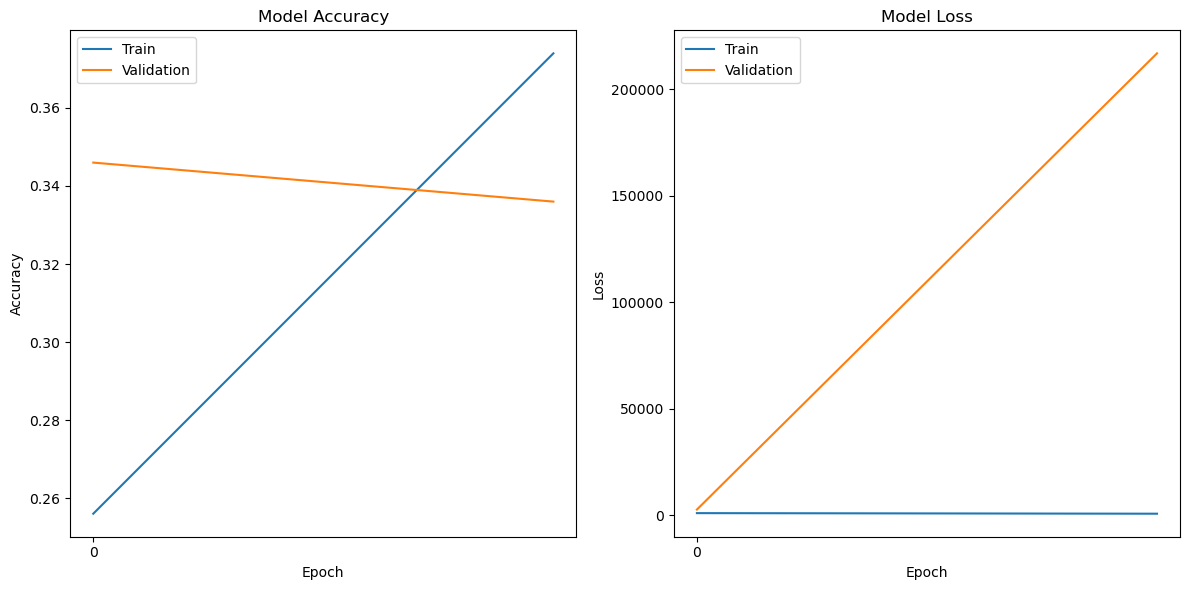

Fold #2


'train_dataset: <_BatchDataset element_spec=(TensorSpec(shape=(None, 1024, 3), dtype=tf.float64, name=None), TensorSpec(shape=(None, 3), dtype=tf.int64, name=None))>'

'val_dataset: <_BatchDataset element_spec=(TensorSpec(shape=(None, 1024, 3), dtype=tf.float64, name=None), TensorSpec(shape=(None, 3), dtype=tf.int64, name=None))>'

'input_tensor: (1024, 3)'

'output_shape: 3'

Epoch 1/2
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3670 - loss: 1023.4135
Epoch 1: val_accuracy improved from -inf to 0.33400, saving model to /home/arsalan/Projects/110_JetscapeML/hm_jetscapeml_source/models/alpha_s_point_net_2_fold_2_epoch_1k_dataset_size_gridexpress_balanced_datatset_test/pointnet_fold_2_model.keras
4/4 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.3528 - loss: 1006.1088 - val_accuracy: 0.3340 - val_loss: 47534952.0000 - learning_rate: 0.0010
Epoch 2/2
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3732 - loss: 720.9479
Epoch 2: val_accuracy did not improve from 0.33400
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.3585 - loss: 709.8890 - val_accuracy: 0.3340 - val_loss: 5579.0439 - learning_rate: 0.0010
Restoring model weights from the end of the best epoch: 1.
Elpased time: 0:00:22
batch_index: 1
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
batch_index: 2
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
batch_index: 3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
batch_ind

2024-10-18 17:10:14.998118: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


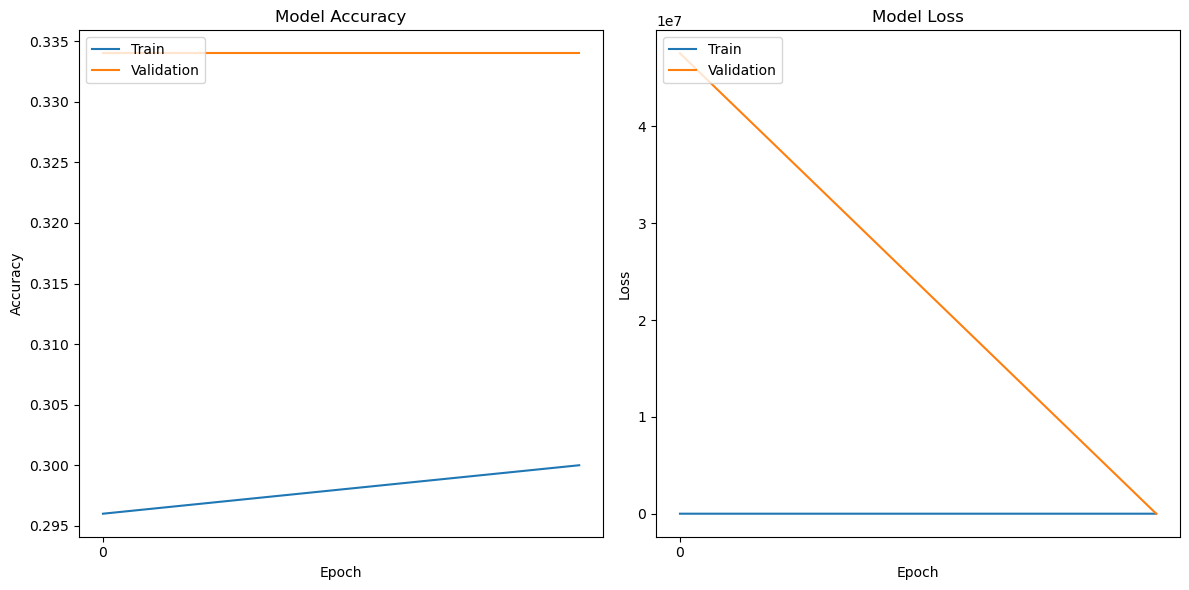

stored all splits' history in training_stats.csv


'out_of_sample_y.shape: '

(1000, 3)

'out_of_sample_y: '

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]])

'out_of_sample_compare.shape: '

(1000,)

'out_of_sample_compare'

array([0, 0, 0, 0, 0])

In [6]:
if folds !=1:
    from jet_ml.dataset import create_tf_dataset
    from jet_ml.models.pointnet import build_model
    from jet_ml.models.helpers import compile_model
    from jet_ml.models.pointnet import train_model
    from jet_ml.evaluation import get_accuracy

    # fold, shuffle, x, y_raw
    import numpy as np
    from sklearn.model_selection import StratifiedKFold
    from sklearn import metrics
    k_fold=StratifiedKFold(folds,shuffle=True,random_state=42)
    
    out_of_sample_y=[]
    out_of_sample_pred=[]
    folds_accuracy=[]
    epochs_needed = []
    times_taken=[]
    fold=0

    #Must specify y StratifiedKFold for classification
    for train,test in k_fold.split(x,y_raw):

        fold+=1
        print(f"Fold #{fold}")

        batch_size=128

        x_train=x_processed[train]
        y_train=y_processed[train]

        train_dataset = create_tf_dataset(x_train, y_train,batch_size=batch_size)
        from jet_ml.models.pointnet import augment_data 
        train_dataset=train_dataset
        # .map(augment_data)
        display(f"train_dataset: {train_dataset}")

        x_test=x_processed[test]
        y_test=y_processed[test]

        val_dataset = create_tf_dataset(x_test, y_test,batch_size=batch_size)
        display(f"val_dataset: {val_dataset}")
        
        input_tensor=x_train[1].shape
        # input_tensor = np.expand_dims(x_train[1], axis=0)
        display(f"input_tensor: {input_tensor}")

        output_shape=y.shape[1]
        display(f"output_shape: {output_shape}")
        activation='softmax'

        import tensorflow as tf
        with tf.device('GPU:0'):#/GPU:0
            model=build_model(num_classes=output_shape,activation=activation)
            # model.summary()

            model=compile_model(model)

            
            monitor='val_accuracy' #'val_accuracy' or 'val_loss'
            
            model, history,elapsed_time,stopped_epoch=train_model(model,
                                                                train_dataset=train_dataset,val_dataset=val_dataset,
                                                                epochs=epochs,batch_size=batch_size,monitor=monitor,
                                                                fold=fold)
            from jet_ml.evaluation import get_accuracy_from_generator
            pred, score=get_accuracy_from_generator(model=model, data_generator=val_dataset)
        print("Accuracy:", score)
        folds_accuracy.append(score)
        times_taken.append(elapsed_time)    
        epochs_needed.append(epochs)

        print (y_test.shape)

        out_of_sample_y.append(y_test)
        out_of_sample_pred.append(pred)
        print(f"Fold score (accuracy): {score}")

        from jet_ml.evaluation import save_training_history
        save_training_history(history=history,fold=fold)

        from jet_ml.evaluation import plot_training_history
        plot_training_history(history=history,fold=fold)
        from jet_ml.evaluation import save_training_stats
    save_training_stats(accuracies=folds_accuracy,
                        epochs_needed=epochs_needed,
                        times_taken=times_taken)

    # Build the oos prediction list and calculate the error.
    out_of_sample_y=np.concatenate(out_of_sample_y)
    display("out_of_sample_y.shape: ", out_of_sample_y.shape)
    display("out_of_sample_y: ",out_of_sample_y[:5])

    out_of_sample_pred=np.concatenate(out_of_sample_pred)

    # convert the out_of_sample_y to a 1D array
    out_of_sample_y_compare=np.argmax(out_of_sample_y,axis=1)# For accuracy and confusion matrix calculation
    display("out_of_sample_compare.shape: ",out_of_sample_y_compare.shape)
    display("out_of_sample_compare" ,out_of_sample_y_compare[:5])
 



In [7]:
from jet_ml.evaluation import calculate_accuracy
calculate_accuracy(out_of_sample_y_compare,out_of_sample_pred)

'accuracy: 0.34'

In [8]:
from jet_ml.evaluation import store_out_of_sample_y_and_predictions
store_out_of_sample_y_and_predictions(y_df,out_of_sample_y,out_of_sample_pred,y_classes)

Confusion matrix, without normalization
[[299  35   1]
 [286  40   7]
 [280  51   1]]
Normalized confusion matrix
[[0.89 0.1  0.  ]
 [0.86 0.12 0.02]
 [0.84 0.15 0.  ]]


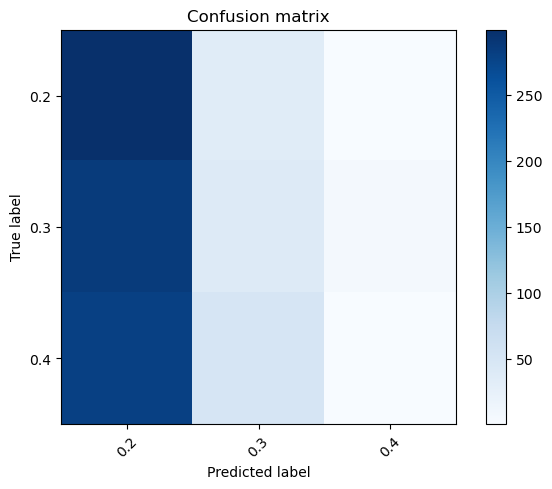

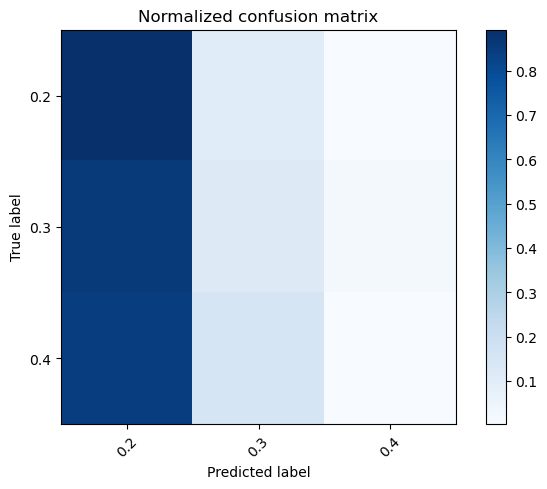

In [9]:
from jet_ml.evaluation import calculate_confusion_matrix
calculate_confusion_matrix(out_of_sample_y_compare, out_of_sample_pred,y_classes)

In [10]:
if folds==1:
    Display("Folds: ",folds)
    import tensorflow as tf
    with tf.device("CPU"):
        from jet_ml.models.pointnet import preprocess_dataset
        (x_train,  y_train,x_test,  y_test)=preprocess_dataset(x, y_raw,is_one_hot_encoded=True)
        print("deleting original dataset")
        del x,y_raw
    with tf.device("CPU"):
        from jet_ml.models.pointnet import create_tf_dataset
        print("converting to tensor data")
        # Create TensorFlow Dataset for training data and test data
        dataset = create_tf_dataset(x_train, y_train)
        test_dataset = create_tf_dataset(x_test, y_test)
        len_x_train=len(x_train)
        len_x_test=len(x_test)
        print("deleting preprocessed dataset")
        del x_train,y_train,x_test,y_test

    from jet_ml.models.pointnet import prepare_datasets
    from jet_ml.models.pointnet import augment

    with tf.device("CPU"):
        # Prepare datasets for training
        print("going to prepare dataset")
        train_dataset, validation_dataset,test_dataset = prepare_datasets(dataset, test_dataset, len_x_train, len_x_test, augment,train_size=1)
        print("deleting initial tensor dataset")
        del dataset

    with tf.device("CPU"):
        print(len(test_dataset))
        print(len(validation_dataset))
    from jet_ml.models.pointnet import build_pointnet_classifier_model

    NUM_POINTS = 1024
    #because alpha_s can get 3 values
    NUM_CLASSES = 3
    activation="softmax"
    # activation="sigmoid"

    pointnet=build_pointnet_classifier_model(NUM_POINTS=NUM_POINTS,NUM_CLASSES=NUM_CLASSES, activation=activation)
    from jet_ml.models.pointnet import compile_pointnet_classifier_model_with_hyperparam
    from jet_ml.models.pointnet import print_model_summary
    learning_rate=0.001
    # loss='sparse_categorical_crossentropy'
    loss='categorical_crossentropy',

    # metrics='sparse_categorical_accuracy'
    metrics=['accuracy']

    pointnet=compile_pointnet_classifier_model_with_hyperparam(pointnet,learning_rate=learning_rate, loss=loss,metrics=metrics)
    # print_model_summary(pointnet)

    best_model_path=f"{config.SIMULATION_MODELS_DIR}/best_model.keras"
    display(best_model_path)


    # %%timeit -n1 -r1
    from jet_ml.models.pointnet import train_model_with_callbacks

    # monitor = 'val_sparse_categorical_accuracy'
    monitor = 'val_accuracy'
    with tf.device('/GPU:0'):
        model, history, train_time = train_model_with_callbacks(
            pointnet, 
            train_dataset=train_dataset, 
            validation_dataset=validation_dataset,
            monitor=monitor, 
            best_model_file_path=best_model_path, 
            n_epochs=epochs
        )
    from jet_ml.evaluation import get_accuracy
    predictions, accuracy = get_accuracy_from_generator(model=model, val_dataset=val_dataset)  # or use train_generator

    print("Predicted classes:", predictions)
    print("Accuracy:", accuracy)